# Question 1

In [211]:
# Import required libraries
import numpy as np
from numpy.fft import fft2, fftshift, ifftshift, ifft2
import matplotlib.pyplot as plt
from PIL import Image

In [212]:
# Create an empty n*m pixel image array
n = 512
m = 512
img = np.zeros((n, m))

# Calculate value of each pixel instensity
for i in range(0, n):
    for j in range(0, m):
        img[i, j] = np.sin(0.1*i) + np.sin(0.2*i) + np.cos(0.4*i) + np.sin(0.15*np.sqrt(i*i+j*j)) + np.sin(0.35*np.sqrt(i*i+j*j))

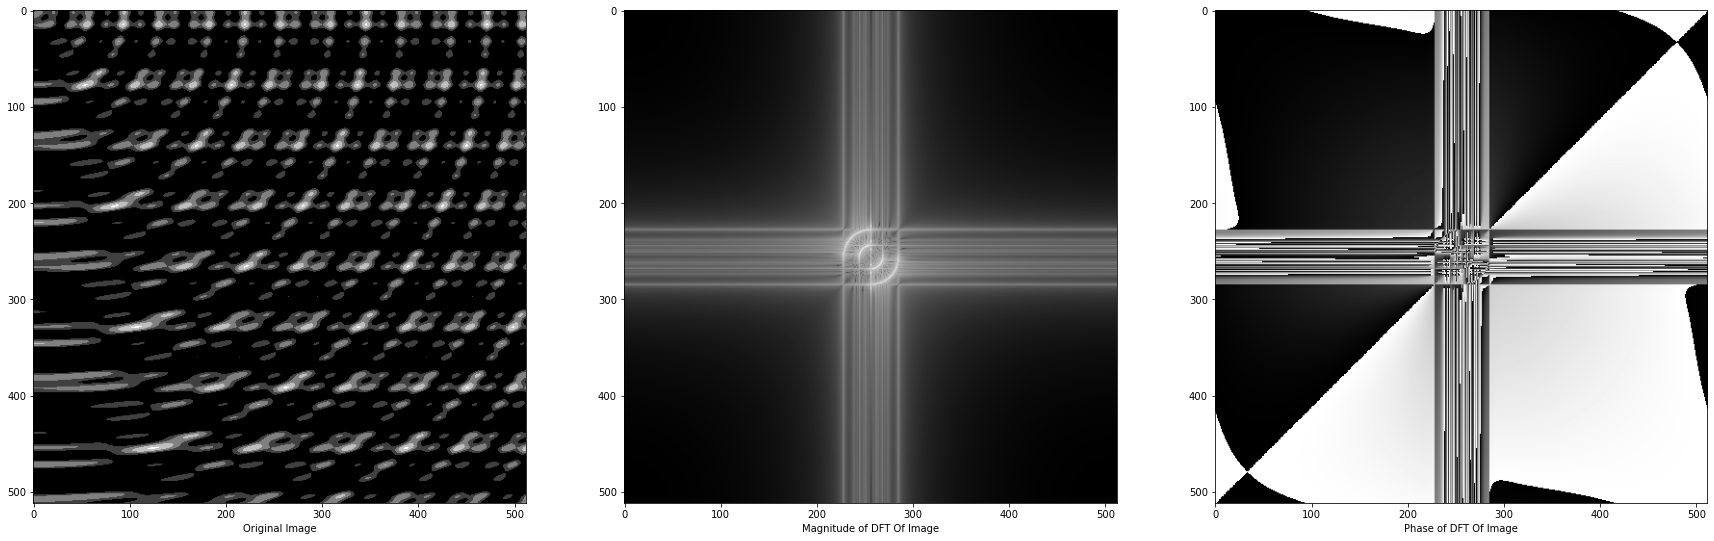

In [213]:
# Compute DFT of the image with shifting
dftImg = fftshift(fft2(img))

# Display the original image and DFT's magnitude and phase

# Convert the image array to Image object to display it using imshow
original_img = Image.fromarray(img)
original_img = original_img.convert("L")

plt.figure( figsize = (30, 30))
plt.subplot(1, 3, 1)
plt.xlabel('Original Image')
plt.imshow(original_img, cmap='gray')

plt.subplot(1, 3, 2)
plt.xlabel('Magnitude of DFT Of Image')
plt.imshow( np.log(np.abs(dftImg)), cmap = 'gray')

plt.subplot(1, 3, 3)
plt.xlabel('Phase of DFT Of Image')
plt.imshow((np.angle(dftImg)), cmap = 'gray')

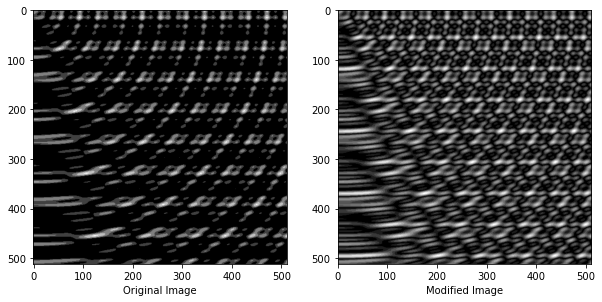

In [214]:
# Multiply the magnitude of DFT by 2 [Direct multiplying will work here and phase will be unaffected by multiplication as numerator and denominator constant will cancel each other]
dftImg = dftImg*2

# Calculate Inverse DFT 
inverse_dft = ifft2(ifftshift(dftImg))

# Convert the inverse_dft to Image object to display it using imshow
inverse_img = Image.fromarray(abs(inverse_dft))
inverse_img = inverse_img.convert("L")

plt.figure( figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.xlabel('Original Image')
plt.imshow(original, cmap="gray")

plt.subplot(1, 2, 2)
plt.xlabel('Modified Image')
plt.imshow(inverse_img, cmap="gray")

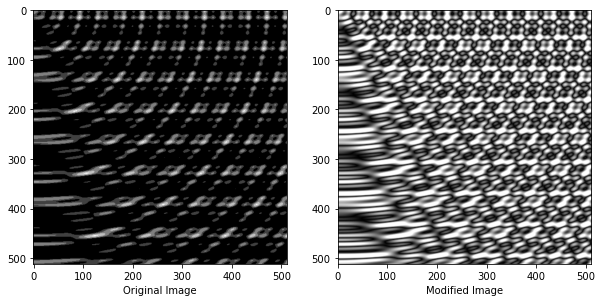

In [215]:
# Image obtained after multiplying the DFT by 2 will be a enhanced image as compared to the original image
# Modified image intensity will be twice that of the original image. Much more details which were hidden in Original image will be visible in Modified image
# If we look at other different example like if we multiply dft by 50 or other big values the output will be as folllows

dftImg = dftImg*50

# Calculate Inverse DFT 
inverse_dft = ifft2(ifftshift(dftImg))

# Convert the inverse_dft to Image object to display it using imshow
inverse_img = Image.fromarray(abs(inverse_dft))
inverse_img = inverse_img.convert("L")

plt.figure( figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.xlabel('Original Image')
plt.imshow(original, cmap="gray")

plt.subplot(1, 2, 2)
plt.xlabel('Modified Image')
plt.imshow(inverse_img, cmap="gray")
# In case of 50, much more details will be visible

# Question 2

In [216]:
# Import required libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Noisy Ball Image

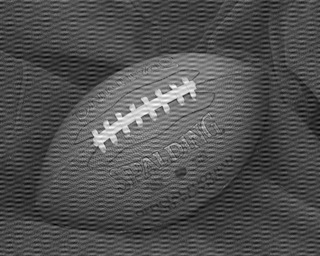

In [217]:
# load NoiseBall image
noiseBallImg = Image.open("NoisyBall.png")
noiseBallImg

In [218]:
noiseBallImg.mode

'L'

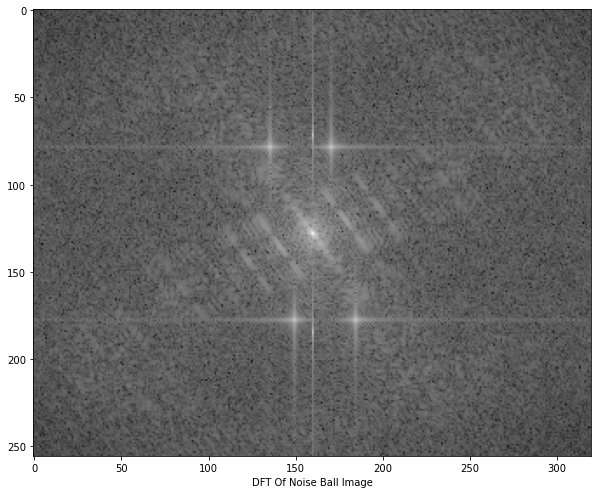

In [219]:
from numpy.fft import fft2, fftshift, ifft2
# Compute DFT with proper shifting
noiseBallDFT = fftshift(fft2(noiseBallImg))
plt.figure( figsize = (10, 10))
plt.xlabel('DFT Of Noise Ball Image')
plt.imshow( np.log(np.abs(noiseBallDFT)), cmap = 'gray' )

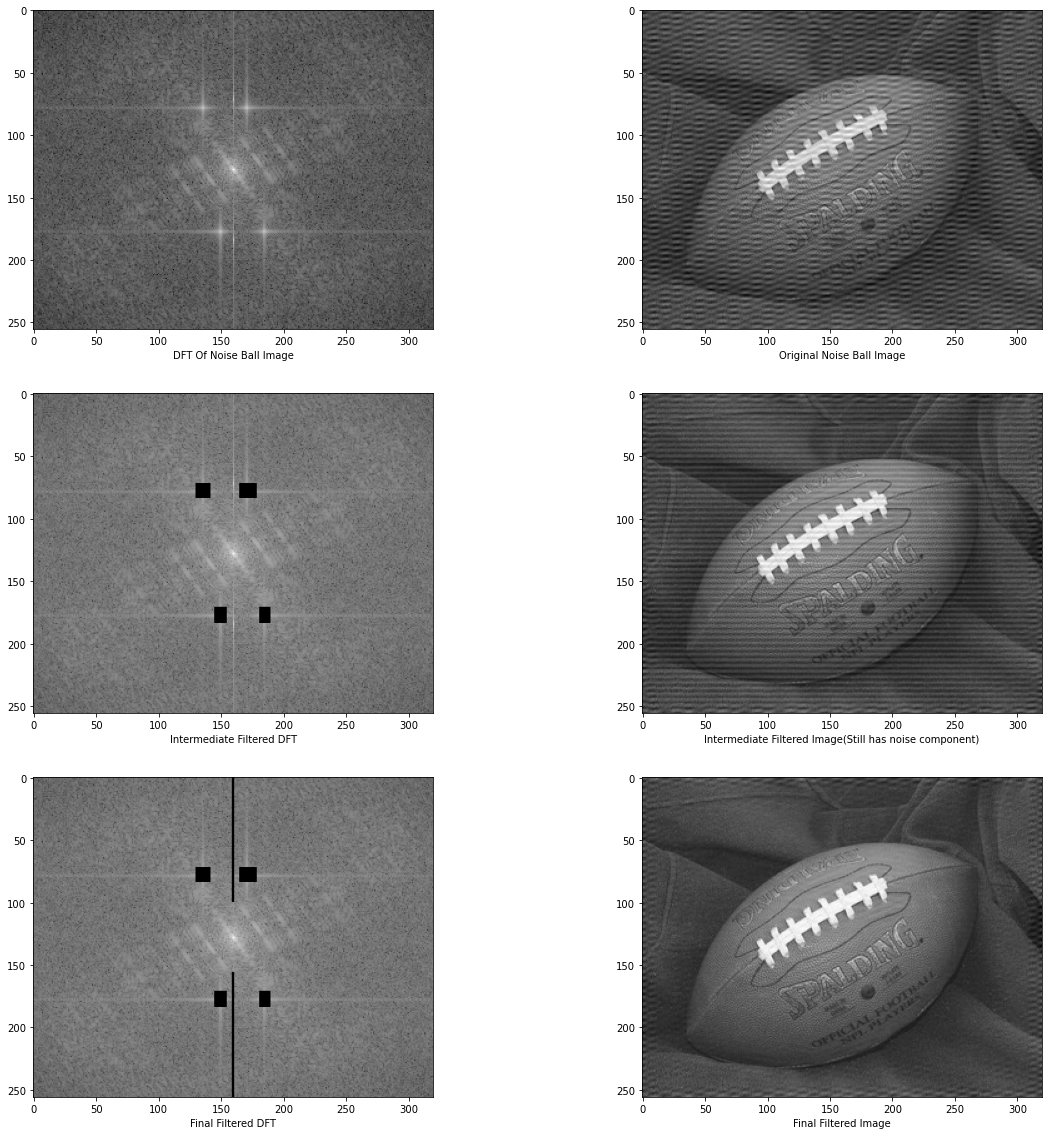

In [220]:
def notch_filter1(image):
    # Compute DFT with proper shifting
    noiseBallDFT = fftshift(fft2(image))
    plt.figure( figsize = (20, 20))
    # Plot DFT
    plt.subplot(3, 2, 1)
    plt.xlabel('DFT Of Noise Ball Image')
    plt.imshow( np.log(abs(noiseBallDFT)), cmap = 'gray' )
    # Mask 4 periodic noise
    noiseBallDFT[72:84, 130:142] = 1
    noiseBallDFT[72:84, 165:179] = 1
    noiseBallDFT[171:184, 145:155] = 1
    noiseBallDFT[171:184, 181:190] = 1
    
    plt.subplot(3, 2, 3)
    plt.xlabel('Intermediate Filtered DFT')
    plt.imshow( np.log(abs(noiseBallDFT)), cmap = 'gray')
    
    plt.subplot(3, 2, 4)
    plt.xlabel('Intermediate Filtered Image(Still has noise component)')
    plt.imshow( abs(ifft2(noiseBallDFT)), cmap = 'gray')
    
    # Mask vertical line to reduce horizontal noise
    noiseBallDFT[:100, 159:161] = 1
    noiseBallDFT[156:, 159:161] = 1
    
    plt.subplot(3, 2, 5)
    plt.xlabel('Final Filtered DFT')
    plt.imshow( np.log(abs(noiseBallDFT)), cmap = 'gray')
    
    plt.subplot(3, 2, 6)
    plt.xlabel('Final Filtered Image')
    plt.imshow( abs(ifft2(noiseBallDFT)), cmap = 'gray') 
        
    plt.subplot(3, 2, 2)
    plt.xlabel('Original Noise Ball Image')
    plt.imshow( image, cmap = 'gray')

notch_filter1(noiseBallImg)

# Part 2: Half Tone Car Image

In [221]:
# Import required libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

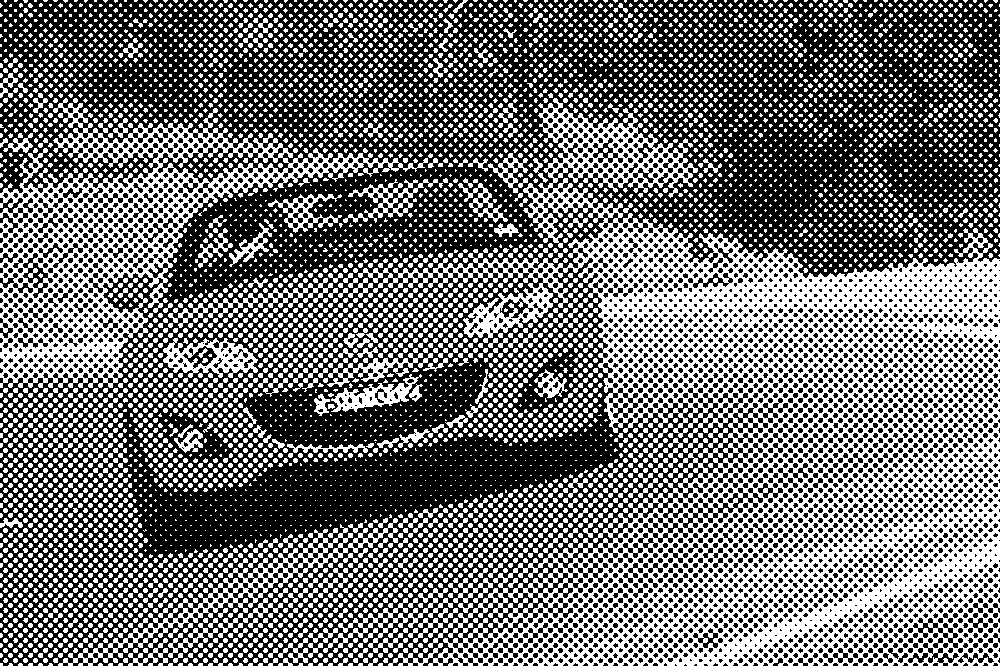

In [222]:
# load halftoneCar image
halftoneCarImg = Image.open("halftoneCar.png")
halftoneCarImg

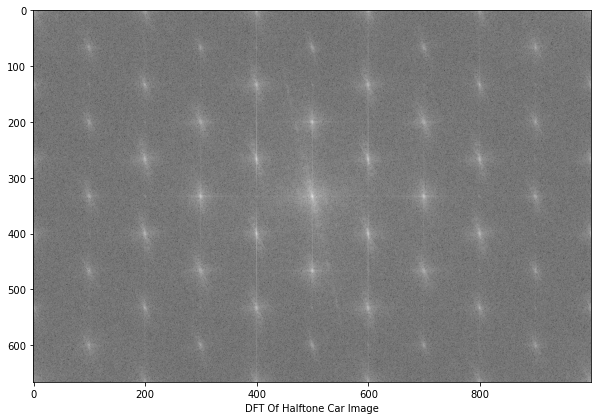

In [223]:
from numpy.fft import fft2, fftshift, ifft2
# Compute DFT with proper shifting
halftoneCarDFT = fftshift(fft2(halftoneCarImg))
plt.figure( figsize = (10, 10))
plt.xlabel('DFT Of Halftone Car Image')
plt.imshow( np.log(np.abs(halftoneCarDFT)), cmap = 'gray')

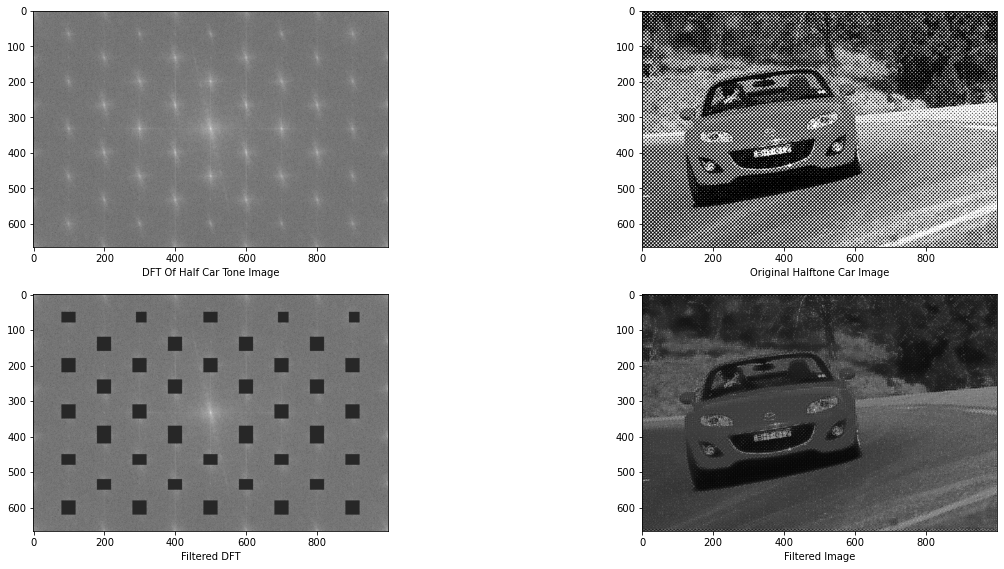

In [224]:
def notch_filter2(image):
    # Compute DFT with proper shifting
    halftoneCarDFT = fftshift(fft2(image))
    plt.figure( figsize = (20, 20))
    
    plt.subplot(4, 2, 1)
    plt.xlabel('DFT Of Half Car Tone Image')
    plt.imshow( np.log(abs(halftoneCarDFT)), cmap = 'gray')
    
    plt.subplot(4, 2, 2)
    plt.xlabel('Original Halftone Car Image')
    plt.imshow( image, cmap = 'gray')
    
    # Apply mask to the periodic noise in the DFT
# Column 1
    halftoneCarDFT[50:80, 80:120] = 1
    halftoneCarDFT[180:220, 80:120] = 1
    halftoneCarDFT[310:350, 80:120] = 1
    halftoneCarDFT[450:480, 80:120] = 1
    halftoneCarDFT[580:620, 80:120] = 1
# Column 2
    halftoneCarDFT[120:160, 180:220] = 1
    halftoneCarDFT[240:280, 180:220] = 1
    halftoneCarDFT[370:420, 180:220] = 1
    halftoneCarDFT[520:550, 180:220] = 1

# Column 3
    halftoneCarDFT[50:80, 290:320] = 1
    halftoneCarDFT[180:220, 280:320] = 1
    halftoneCarDFT[310:350, 280:320] = 1
    halftoneCarDFT[450:480, 280:320] = 1
    halftoneCarDFT[580:620, 280:320] = 1
# Column 4   
    halftoneCarDFT[120:160, 380:420] = 1
    halftoneCarDFT[240:280, 380:420] = 1
    halftoneCarDFT[370:420, 380:420] = 1
    halftoneCarDFT[520:550, 380:420] = 1
# Column 5
    halftoneCarDFT[50:80, 480:520] = 1
    halftoneCarDFT[180:220, 480:520] = 1
    halftoneCarDFT[450:480, 480:520] = 1
    halftoneCarDFT[580:620, 480:520] = 1
# Column 6   
    halftoneCarDFT[120:160, 580:620] = 1
    halftoneCarDFT[240:280, 580:620] = 1
    halftoneCarDFT[370:420, 580:620] = 1
    halftoneCarDFT[520:550, 580:620] = 1   
# Column 7
    halftoneCarDFT[50:80, 690:720] = 1
    halftoneCarDFT[180:220, 680:720] = 1
    halftoneCarDFT[310:350, 680:720] = 1
    halftoneCarDFT[450:480, 680:720] = 1
    halftoneCarDFT[580:620, 680:720] = 1
# Column 8   
    halftoneCarDFT[120:160, 780:820] = 1
    halftoneCarDFT[240:280, 780:820] = 1
    halftoneCarDFT[370:420, 780:820] = 1
    halftoneCarDFT[520:550, 780:820] = 1
# Column 9
    halftoneCarDFT[50:80, 890:920] = 1
    halftoneCarDFT[180:220, 880:920] = 1
    halftoneCarDFT[310:350, 880:920] = 1
    halftoneCarDFT[450:480, 880:920] = 1
    halftoneCarDFT[580:620, 880:920] = 1
    
    plt.subplot(4, 2, 3)
    plt.imshow( np.log(abs(halftoneCarDFT)), cmap = 'gray')
    plt.xlabel('Filtered DFT')
    plt.subplot(4, 2, 4)
    plt.imshow( abs(ifft2(halftoneCarDFT)), cmap = 'gray')
    plt.xlabel('Filtered Image')
    
notch_filter2(halftoneCarImg)